In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.model_selection
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import where
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
X = pd.read_csv('truncatedHashtx.1.csv')
X = X.head(50000)
X.drop(["No."], axis=1, inplace=True)

In [3]:
# List of the column names with nominal features that should be one-hot encoded
onehot_features = ['Source', 'Destination', 'Protocol', 'Info']

# One-hot encode these features 
onehot = sklearn.preprocessing.OneHotEncoder(sparse=False) # we want a non-sparse matrix for concatenation
encoded = onehot.fit_transform(X[onehot_features])
encoded = pd.DataFrame(encoded) # the output of the encoding is a NumPy array, but we want it as a Pandas DataFrame

# One-hot encoding produces an output with more columns than the input, so we can't just reassign the output to X. 
# There are a few ways to put the encoded features in the original dataframe, but none of them are that elegant, so we'll just drop the old columns and concatenate the new
X.drop(onehot_features, axis=1, inplace=True)
X = pd.concat([X, encoded], axis=1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [8]:
#Dimensionality Reduction to 2 Dimensions
pca = PCA(2)
X1_pca = pca.fit_transform(X)
print(X1_pca)

[[ 1.25228151  0.74239671]
 [-0.94698937  0.86309516]
 [-0.89974909  0.83701017]
 ...
 [-0.72588315 -0.79561842]
 [ 1.1783592  -0.86071348]
 [ 1.17835801 -0.86073932]]


In [9]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1))
model.fit(X1_pca)

IsolationForest(contamination=0.1, n_estimators=50)

In [10]:
pred = model.fit_predict(X1_pca)

In [11]:
#Find indexes of anomalous datapoints 
anom_index = where(pred==-1)
values = X1_pca[anom_index]
#Get the count of anoamlous datapoints 
print(len(values))

4978


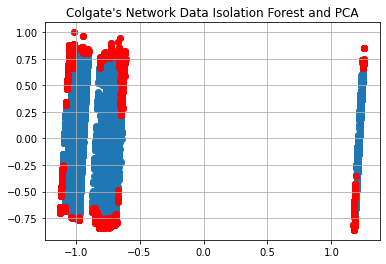

In [12]:
plt.figure()
plt.title("Colgate's Network Data Isolation Forest and PCA")
plt.scatter(X1_pca[:,0], X1_pca[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.grid(True)
plt.show()

In [4]:
#Dimensionality Reduction to 2 Dimensions
tsne = TSNE(2)
X2_tsne = tsne.fit_transform(X)

In [5]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(X2_tsne)

IsolationForest(contamination=0.1, n_estimators=50)

In [6]:
pred1 = model.fit_predict(X2_tsne)

In [7]:
anom_index1 = where(pred1==-1)
values1 = X2_tsne[anom_index1]
print(len(values1))

4996


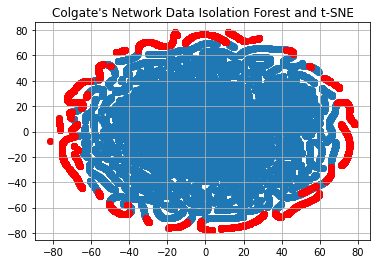

In [8]:
plt.figure()
plt.title("Colgate's Network Data Isolation Forest and t-SNE")
plt.scatter(X2_tsne[:,0], X2_tsne[:,1])
plt.scatter(values1[:,0], values1[:,1], color='r')
plt.grid(True)
plt.show()

In [1]:
similar_anom = []
for x in anom_index:
    if x in anom_index1:
        similar_anom.append(x)
print(len(similar_anom))

NameError: name 'anom_index' is not defined